`Team 16
Thuật toán ARIMA về dự đoán giá Vàng, Bạch Kim, Bạc`

In [1]:
#Cài đặt thư viện
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use("ggplot")
import numpy as np 
import pandas as pd 
import os
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

In [2]:
#Đọc file dữ liệu và xem dữ liệu
df = pd.read_csv('../SilverData.csv',parse_dates=True)
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL
0,21/5/2018,16.520,16.430,16.535,16.280,63.89K
1,22/5/2018,16.575,16.530,16.700,16.465,73.53K
2,23/5/2018,16.405,16.555,16.600,16.330,89.46K
3,24/5/2018,16.687,16.475,16.715,16.420,91.02K
4,25/5/2018,16.546,16.690,16.740,16.500,72.71K
...,...,...,...,...,...,...
1275,15/5/2023,24.175,24.030,24.270,23.945,0.17K
1276,16/5/2023,23.783,24.115,24.115,23.710,0.18K
1277,17/5/2023,23.789,23.830,23.940,23.650,0.18K
1278,18/5/2023,23.523,23.840,23.840,23.380,0.35K


In [3]:
#Xem các dữ liệu cơ bản của cảc thuộc tính
df.describe()

,Lần cuối,Mở,Cao,Thấp
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,20.414323,20.428459,20.685217,20.134988
std,4.325552,4.335049,4.437082,4.203927
min,11.772000,11.975000,12.330000,11.640000
25%,16.223000,16.252500,16.388750,16.080000
50%,20.350500,20.312500,20.762500,19.987500
75%,24.250750,24.251250,24.580000,23.872500
max,29.418000,29.235000,30.350000,28.155000


In [4]:
#Kiểm tra dữ liệu rỗng
df.isnull().sum()

Ngày         0
Lần cuối     0
Mở           0
Cao          0
Thấp         0
KL          28
dtype: int64

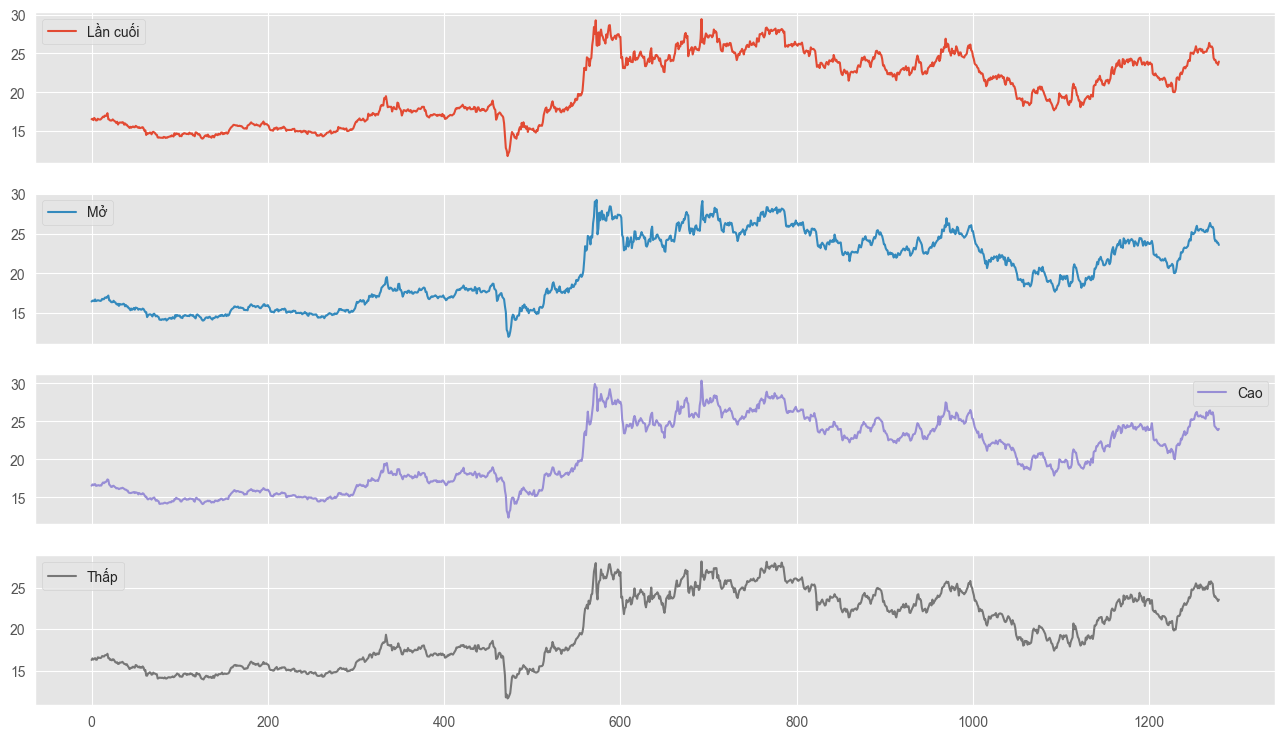

In [5]:
#Xem độ biến thiên của từng thuộc tính.
df.plot(legend=True,subplots=True, figsize = (16, 9))
plt.show()

In [6]:
#Chuyển dataset về cột Close để tiến hành tạo model
df = df[['Lần cuối']]
df

,Lần cuối
0,16.520
1,16.575
2,16.405
3,16.687
4,16.546
...,...
1275,24.175
1276,23.783
1277,23.789
1278,23.523


In [7]:
#Chia dữ liệu theo các tỷ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data_df = df[:train_size]
test_data_df = df[train_size:train_size+test_size]
val_data_df = df[train_size+test_size:]


In [8]:
#Đánh giá 
def deviation(test, pred):
  rmse= np.sqrt(mean_squared_error(test,pred))
  print(f"RMSE: {rmse:.2f}")
  mape= mean_absolute_percentage_error(test,pred)
  print(f"MAPE: {mape*100:.2f}%")
  mae = mean_absolute_error(test, pred)
  print(f"MAE: {mae:.2f}")

In [9]:
#Hàm visualize
def visualize(label ,pred, model_name):
  plt.figure(figsize=(12,8))
  plt.plot(label, label = 'Ground truth')
  plt.plot(label.index, pred, label='Predict')
  plt.title(model_name)
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [10]:
len(test_data_df), len(val_data_df)

(256, 128)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1075.643, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1089.579, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1076.152, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1077.689, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1087.977, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1077.495, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1077.971, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1076.603, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1074.875, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1076.525, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1073.989, Time=0.56 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1072.057, Time=0.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1

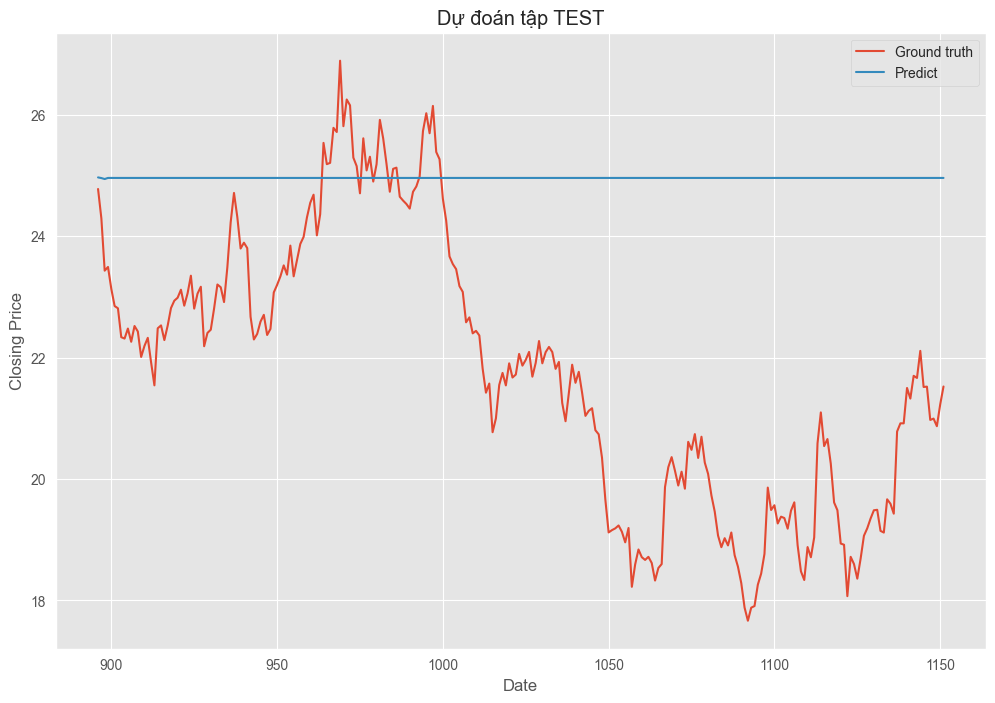

RMSE: 3.90
MAPE: 16.39%
MAE: 3.32


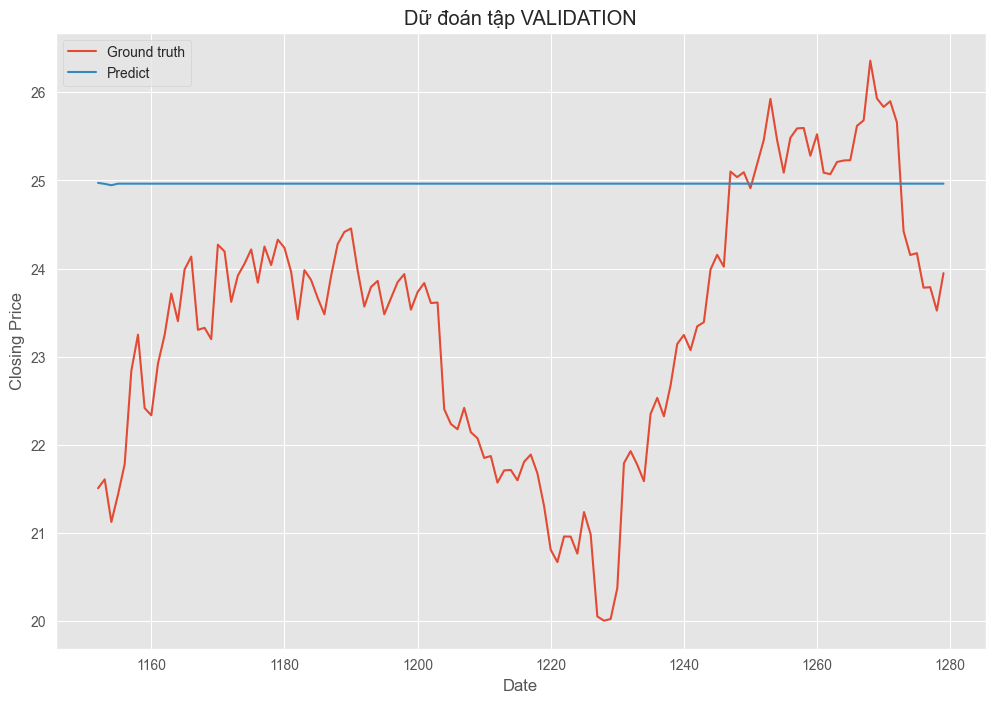

RMSE: 2.17
MAPE: 7.92%
MAE: 1.77


In [11]:
fit_model = auto_arima(train_data_df, seasonal=False, trace=True)
fit_model.summary()

#dự đoán tập test
test_predict = fit_model.predict(len(test_data_df))
visualize(test_data_df, test_predict, 'Dự đoán tập TEST')
deviation(test_data_df, test_predict)
#dự đoán tập validate
val_predict = fit_model.predict(len(val_data_df))
visualize(val_data_df, val_predict, 'Dữ đoán tập VALIDATION')
deviation(val_data_df, val_predict)
# next30_predict_inverse = arima_next30days(model, scaler , y_val, val_data_df, time_step)

In [12]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = fit_model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
896    24.972120
897    24.961092
898    24.945337
899    24.963265
900    24.963265
901    24.963265
902    24.963265
903    24.963265
904    24.963265
905    24.963265
906    24.963265
907    24.963265
908    24.963265
909    24.963265
910    24.963265
911    24.963265
912    24.963265
913    24.963265
914    24.963265
915    24.963265
916    24.963265
917    24.963265
918    24.963265
919    24.963265
920    24.963265
921    24.963265
922    24.963265
923    24.963265
924    24.963265
925    24.963265
dtype: float64


In [13]:
last_data

RangeIndex(start=1279, stop=1309, step=1)

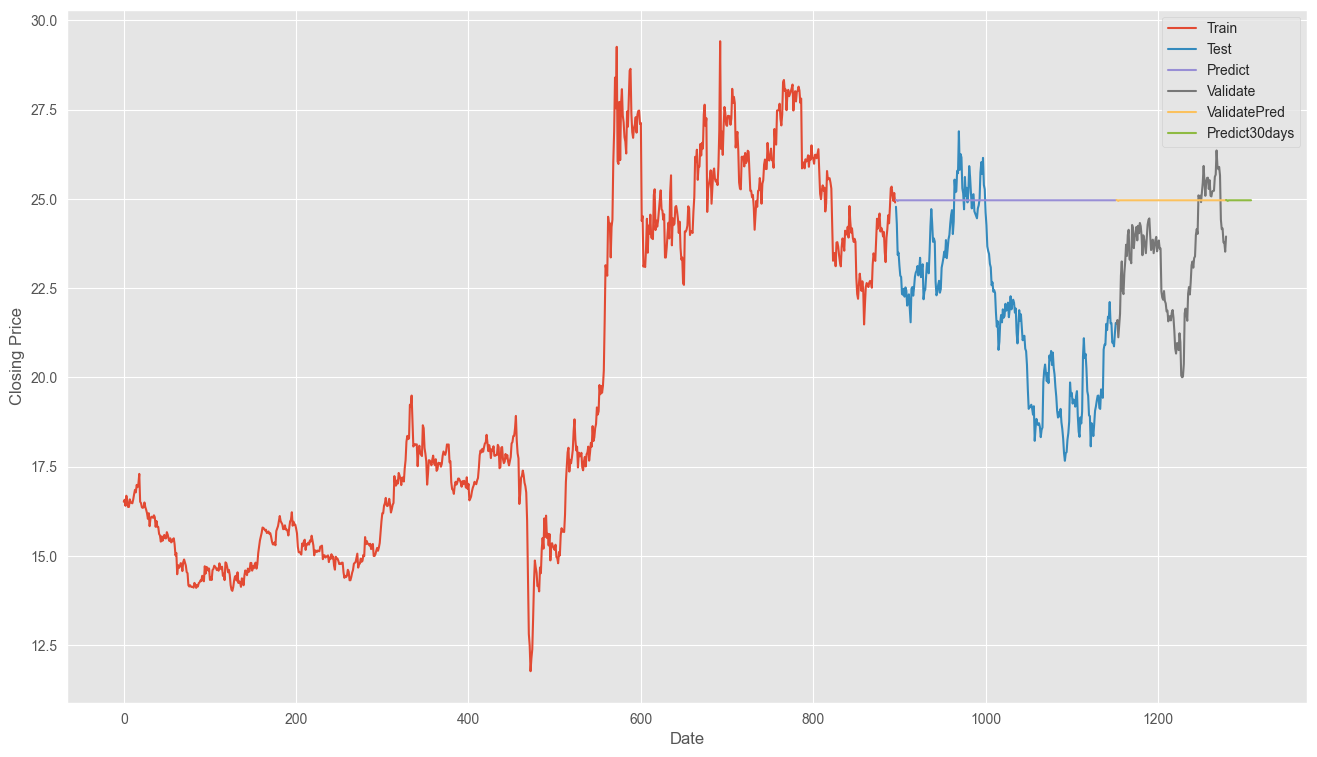

In [14]:
#Visualization
plt.figure(figsize=(16,9))
#train label
plt.plot(train_data_df, label = 'Train')

#test label and predict value
plt.plot(test_data_df, label = 'Test')
plt.plot(test_data_df.index, test_predict, label='Predict')

#val label and predict value
plt.plot(val_data_df, label = 'Validate')
plt.plot(val_data_df.index, val_predict, label='ValidatePred')

#predict next 30 days value
plt.plot(last_data,y_next_30_days, label = 'Predict30days')


# plt.title(model_name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()